In [11]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'

# Options Payoff

## Value of an Option at maturity $T$
A European Call Option on a security with price $S_t$ with strike price $K$ with maturity $T$ has a payoff $h_T$ at expiry. The payoff can be given as -
$$h_T = max\{S_T-K, 0\}$$

For a European call option on an index with strike 8,000 and index level of 8,200
at maturity, the option holder receives the difference 8,200 − 8,000 = 200 (e.g. in EUR or
USD) from the option writer. If the index level is below the strike, say at 7,800, the option
expires worthless and the writer does not have to pay anything.

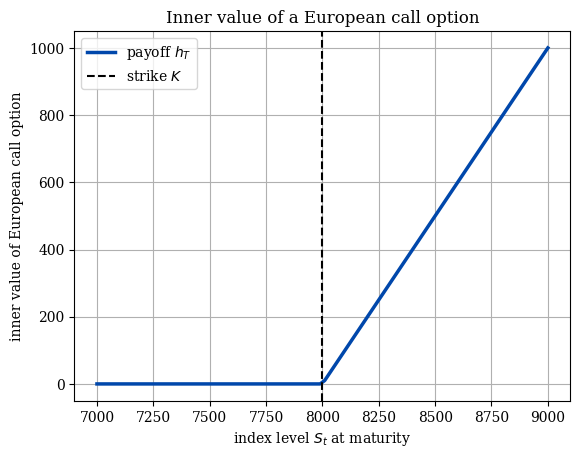

In [22]:
# Option Strike
K = 8000
# Graphical Output
S = np.linspace(7000, 9000, 100) # index level values
h = np.maximum(S - K, 0) # inner values of call option
plt.figure()
plt.plot(S, h, lw=2.5, c='#0047AB', label='payoff $h_T$') # plot inner values at maturity
plt.axvline(K, c='k', ls='--', label='strike $K$') # plot strike price as a line
plt.xlabel('index level $S_t$ at maturity')
plt.ylabel('inner value of European call option')
plt.title('Inner value of a European call option')
plt.grid(True)
plt.legend();

## Value of an Option at $t < T$
Black-Scholes-Merton who for the first time derived a closed option pricing formula for a parsimonious set of input parameters. Their formula says mainly the following
$$C_0^{*} = C_{BSM}(S_0,K,T,r,\sigma)$$
In words, the fair present value of a European call option $C_0^{*}$ is given by their formula $C_{BSM}(.)$ which takes as input parameters:
- $S_0$ the current index level
- $K$ the strike price of the option
- $T$ the maturity date (equals time-to-maturity viewed from the present date)
- $r$ the constant risk-less short rate
- $\sigma$ the volatility of the index, i.e. the standard deviation of the index level returns

<i>The present value of the option is always above the (undiscounted) inner value. The
difference between the two is generally referred to as the time value of the option. In this sense,
the option’s present value is composed of the inner value plus the time value. Time value is
suggestive of the fact that the option still has time to get in-the-money or to get even more
in-the-money.<i>

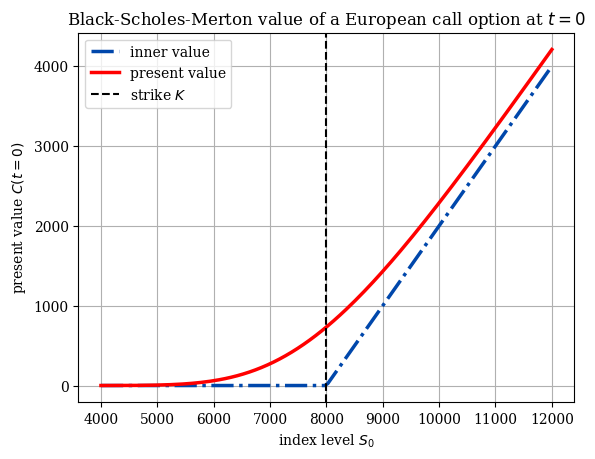

In [33]:
from scipy import stats

# Helper Function
def BSM_call_value(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM Model.
    --> Analytical Formula.
    Parameters
    ==========
    S0: float
    initial stock/index level
    K: float
    strike price
    T: float
    time-to-maturity (for t=0)
    r: float
    constant risk-free short rate
    sigma: float
    volatility factor in diffusion term
    Returns
    =======
    call_value: float
    European call option present value
    '''
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) \
    / (sigma * np.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) \
    / (sigma * np.sqrt(T))
    BS_C = (S0 * stats.norm.cdf(d1, 0.0, 1.0)
    - K * np.exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return BS_C

# Model and Option Parameters
K = 8000 # strike price
T = 1.0 # time-to-maturity
r = 0.025 # constant, risk-less short rate
vol = 0.2 # constant volatility
# Sample Data Generation
S = np.linspace(4000, 12000, 150) # vector of index level values

h = np.maximum(S - K, 0) # inner value of option
C = [BSM_call_value(S0, K, T, r, vol) for S0 in S]
# calculate call option values
# Graphical Output
plt.figure()
plt.plot(S, h, '-.', c='#0047AB', lw=2.5, label='inner value')
# plot inner value at maturity
plt.plot(S, C, 'r', lw=2.5, label='present value')
plt.axvline(K, c='k', ls='--', label='strike $K$')
# plot option present value
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('index level $S_0$')
plt.ylabel('present value $C(t=0)$')
plt.title('Black-Scholes-Merton value of a European call option at $t=0$');

# Volatility and Variance

In [35]:
import math
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm

In [40]:
# Helper Function
def dN(x, mu, sigma):
    ''' Probability density function of a normal random variable x.
    Parameters
    ==========
    mu: float
    expected value
    sigma: float
    standard deviation
    Returns
    =======
    pdf: float
    value of probability density function
    '''
    z = (x - mu) / sigma
    pdf = np.exp(-0.5 * z ** 2) / math.sqrt(2 * math.pi * sigma ** 2)
    return pdf

# Analyzing Returns from Geometric Brownian Motion
# Simulate a Number of Years of Daily Stock Quotes

def simulate_gbm():
    # model parameters
    S0 = 100.0 # initial index level
    T = 10.0 # time horizon
    r = 0.05 # risk-less short rate
    vol = 0.2 # instantaneous volatility
    # simulation parameters
    np.random.seed(250000)
    gbm_dates = pd.date_range(start='30-09-2014',
                                end='30-09-2024',
                                freq='D')
    M = len(gbm_dates) # time steps
    I = 1 # index level paths
    dt = 1 / 252. # fixed for simplicity
    df = math.exp(-r * dt) # discount factor
    # stock price paths
    rand = np.random.standard_normal((M, I)) # random numbers
    S = np.zeros_like(rand) # stock matrix
    S[0] = S0 # initial values
    for t in range(1, M): # stock price paths
        S[t] = S[t - 1] * np.exp((r - vol ** 2 / 2) * dt
        + vol * rand[t] * math.sqrt(dt))
    gbm = pd.DataFrame(S[:, 0], index=gbm_dates, columns=['index'])
    gbm['returns'] = np.log(gbm['index'] / gbm['index'].shift(1))
    ## Realized Volatility (eg. as defined for variance swaps)
    gbm['rea_var'] = 252 * np.cumsum(gbm['returns'] ** 2) / np.arange(len(gbm))
    gbm['rea_vol'] = np.sqrt(gbm['rea_var'])
    gbm = gbm.dropna()
    return gbm

In [41]:
data = simulate_gbm()

In [42]:
data

,index,returns,rea_var,rea_vol
2014-10-01,98.904295,-0.011018,0.030589,0.174898
2014-10-02,98.444867,-0.004656,0.018026,0.134261
2014-10-03,97.696364,-0.007632,0.016911,0.130041
2014-10-04,98.280594,0.005962,0.014922,0.122158
2014-10-05,99.242342,0.009738,0.016718,0.129296
...,...,...,...,...
2024-09-26,113.235010,-0.004704,0.040592,0.201476
2024-09-27,112.689601,-0.004828,0.040583,0.201452
2024-09-28,111.195893,-0.013344,0.040584,0.201455
2024-09-29,110.699411,-0.004475,0.040574,0.201431


In [43]:
# Return Sample Statistics and Normality Tests
def print_statistics(data):
    print("RETURN SAMPLE STATISTICS")
    print("---------------------------------------------")
    print("Mean of Daily Log Returns %9.6f" % np.mean(data['returns']))
    print("Std of Daily Log Returns %9.6f" % np.std(data['returns']))
    print("Mean of Annua. Log Returns %9.6f" % (np.mean(data['returns']) * 252))
    print("Std of Annua. Log Returns %9.6f" % \
    (np.std(data['returns']) * math.sqrt(252)))
    print("---------------------------------------------")
    print("Skew of Sample Log Returns %9.6f" % scs.skew(data['returns']))
    print("Skew Normal Test p-value %9.6f" % scs.skewtest(data['returns'])[1])
    print("---------------------------------------------")
    print("Kurt of Sample Log Returns %9.6f" % scs.kurtosis(data['returns']))
    print("Kurt Normal Test p-value %9.6f" % \
    scs.kurtosistest(data['returns'])[1])
    print("---------------------------------------------")
    print("Normal Test p-value %9.6f" % \
    scs.normaltest(data['returns'])[1])
    print("---------------------------------------------")
    print("Realized Volatility %9.6f" % data['rea_vol'].iloc[-1])
    print("Realized Variance %9.6f" % data['rea_var'].iloc[-1])
print_statistics(data)

RETURN SAMPLE STATISTICS
---------------------------------------------
Mean of Daily Log Returns  0.000026
Std of Daily Log Returns  0.012688
Mean of Annua. Log Returns  0.006588
Std of Annua. Log Returns  0.201409
---------------------------------------------
Skew of Sample Log Returns -0.039283
Skew Normal Test p-value  0.331600
---------------------------------------------
Kurt of Sample Log Returns  0.080682
Kurt Normal Test p-value  0.307499
---------------------------------------------
Normal Test p-value  0.370829
---------------------------------------------
Realized Volatility  0.201410
Realized Variance  0.040566


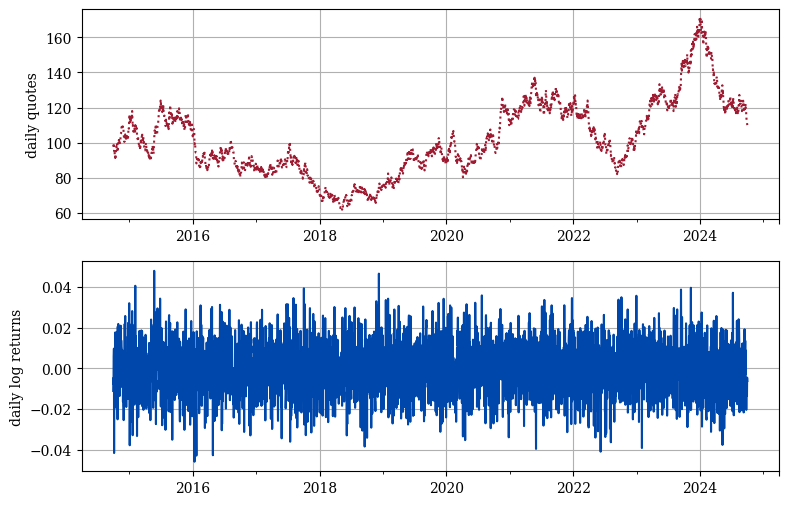

In [46]:
# daily quotes and log returns
def quotes_returns(data):
    ''' Plots quotes and returns. '''
    plt.figure(figsize=(9, 6))
    plt.subplot(211)
    data['index'].plot(c='#9e1b32', ls='dotted')
    plt.ylabel('daily quotes')
    plt.grid(True)
    plt.axis('tight')
    plt.subplot(212)
    data['returns'].plot(c='#0047AB')
    plt.ylabel('daily log returns')
    plt.grid(True)
    plt.axis('tight')
quotes_returns(data)

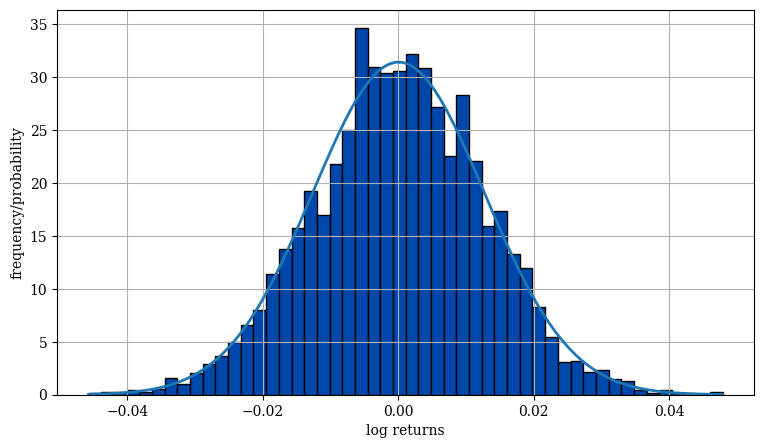

In [52]:
# histogram of annualized daily log returns
def return_histogram(data):
    ''' Plots a histogram of the returns. '''
    plt.figure(figsize=(9, 5))
    x = np.linspace(min(data['returns']), max(data['returns']), 100)
    plt.hist(np.array(data['returns']), bins=50, density=True, color='#0047AB', ec='k')
    y = dN(x, np.mean(data['returns']), np.std(data['returns']))
    plt.plot(x, y, linewidth=2)
    plt.xlabel('log returns')
    plt.ylabel('frequency/probability')
    plt.grid(True)
    # Q-Q plot of annualized daily log returns
return_histogram(data)

<Figure size 900x500 with 0 Axes>

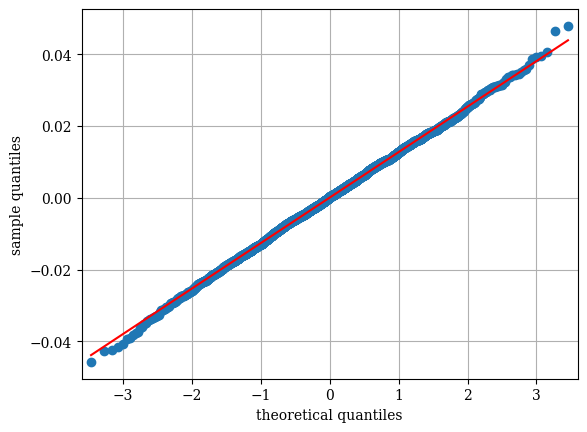

In [59]:
def return_qqplot(data):
    ''' Generates a Q-Q plot of the returns.'''
    plt.figure(figsize=(9, 5))
    sm.qqplot(data['returns'], line='s');
    plt.grid(True)
    plt.xlabel('theoretical quantiles')
    plt.ylabel('sample quantiles')
    
return_qqplot(data)

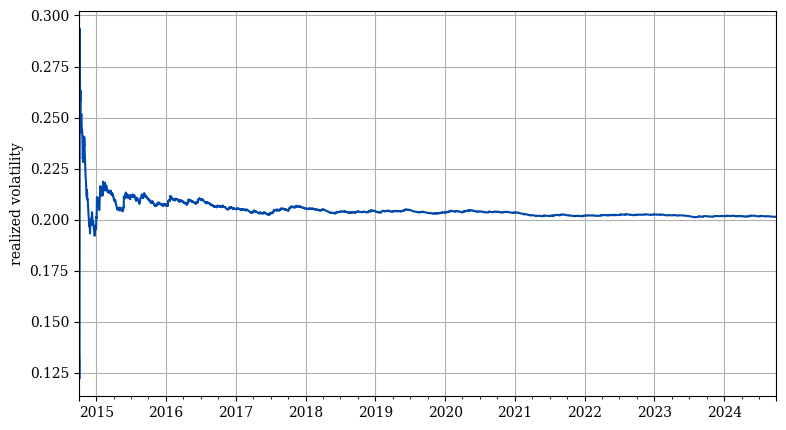

In [61]:
# realized volatility
def realized_volatility(data):
    ''' Plots the realized volatility. '''
    plt.figure(figsize=(9, 5))
    data['rea_vol'].plot(c='#0047AB')
    plt.ylabel('realized volatility')
    plt.grid(True)

realized_volatility(data)

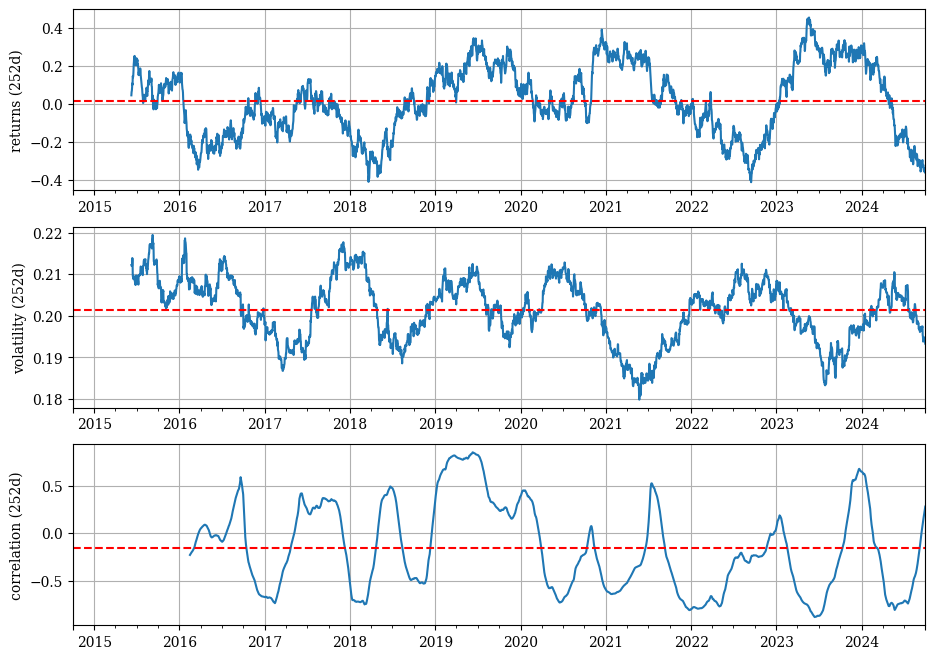

In [65]:
# mean return, volatility and correlation (252 days moving = 1 year)
def rolling_statistics(data):
    ''' Calculates and plots rolling statistics (mean, std, correlation). '''
    plt.figure(figsize=(11, 8))
    plt.subplot(311)
    mr = data['returns'].rolling(252).mean() * 252
    mr.plot()
    plt.grid(True)
    plt.ylabel('returns (252d)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)
    plt.subplot(312)
    vo = data['returns'].rolling(252).std() * math.sqrt(252)
    vo.plot()
    plt.grid(True)
    plt.ylabel('volatility (252d)')
    plt.axhline(vo.mean(), color='r', ls='dashed', lw=1.5)
    vx = plt.axis()
    plt.subplot(313)
    co = mr.rolling(252).corr(vo)
    co.plot()
    plt.grid(True)
    plt.ylabel('correlation (252d)')
    cx = plt.axis()
    plt.axis([vx[0], vx[1], cx[2], cx[3]])
    plt.axhline(co.mean(), color='r', ls='dashed', lw=1.5)

rolling_statistics(data)

In [66]:
# Analyzing DAX Index Quotes and Returns
import pandas.io.data as web
# Read Data for DAX from the Web
def read_dax_data():
    ''' Reads historical DAX data from Yahoo! Finance, calculates log returns,
    realized variance and volatility.'''
    DAX = web.DataReader('ˆGDAXI', data_source='yahoo',
    start='30-09-2004', end='30-09-2014')
    DAX.rename(columns={'Adj Close' : 'index'}, inplace=True)
    DAX['returns'] = np.log(DAX['index'] / DAX['index'].shift(1))
    DAX['rea_var'] = 252 * np.cumsum(DAX['returns'] ** 2) / np.arange(len(DAX))
    DAX['rea_vol'] = np.sqrt(DAX['rea_var'])
    DAX = DAX.dropna()
    return DAX
def count_jumps(data, value):
    ''' Counts the number of return jumps as defined in size by value. '''
    jumps = np.sum(np.abs(data['returns']) > value)
    return jumps

ModuleNotFoundError: No module named 'pandas.io.data'

In [69]:
# Valuation of European Call Options in BSM Model
# and Numerical Derivation of Implied Volatility
from math import log, sqrt, exp
from scipy import stats
from scipy.optimize import fsolve
class call_option(object):
    ''' Class for European call options in BSM Model.
    Attributes
    ==========
    S0: float
    initial stock/index level
    K: float
    strike price
    t: datetime/Timestamp object
    pricing date
    M: datetime/Timestamp object
    maturity date
    r: float
    constant risk-free short rate
    sigma: float
    volatility factor in diffusion term
    Methods
    =======
    value: float
    return present value of call option
    vega: float
    return vega of call option
    imp_vol: float
    return implied volatility given option quote
    '''
    def __init__(self, S0, K, t, M, r, sigma):
        self.S0 = float(S0)
        self.K = K
        self.t = t
        self.M = M
        self.r = r
        self.sigma = sigma
    def update_ttm(self):
        ''' Updates time-to-maturity self.T. '''
        if self.t > self.M:
            raise ValueError("Pricing date later than maturity.")
        self.T = (self.M - self.t).days / 365.
    def d1(self):
        ''' Helper function. '''
        d1 = ((log(self.S0 / self.K)
        + (self.r + 0.5 * self.sigma ** 2) * self.T)
        / (self.sigma * sqrt(self.T)))
        return d1
    def value(self):
        ''' Return option value. '''
        self.update_ttm()
        d1 = self.d1()
        d2 = ((log(self.S0 / self.K)
        + (self.r - 0.5 * self.sigma ** 2) * self.T)
        / (self.sigma * sqrt(self.T)))
        value = (self.S0 * stats.norm.cdf(d1, 0.0, 1.0)
        - self.K * exp(-self.r * self.T) * stats.norm.cdf(d2, 0.0, 1.0))
        return value
    def vega(self):
        ''' Return Vega of option. '''
        self.update_ttm()
        d1 = self.d1()
        vega = self.S0 * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(self.T)
        return vega
    def imp_vol(self, C0, sigma_est=0.2):
        ''' Return implied volatility given option price. '''
        option = call_option(self.S0, self.K, self.t, self.M,
        self.r, sigma_est)
        option.update_ttm()
        def difference(sigma):
            option.sigma = sigma
            return option.value() - C0
        iv = fsolve(difference, sigma_est)[0]
        return iv

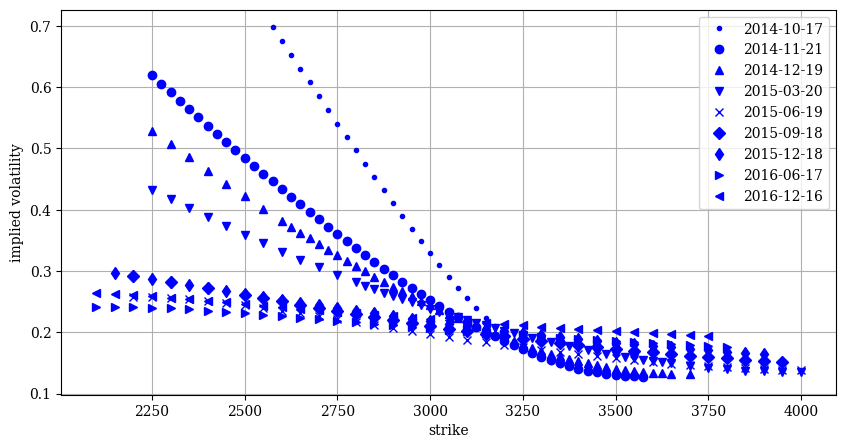

In [75]:
# Black-Scholes-Merton Implied Volatilities of
# Call Options on the EURO STOXX 50
# Option Quotes from 30. September 2014

# Pricing Data
pdate = pd.Timestamp('30-09-2014')
#
# EURO STOXX 50 index data
#
# # URL of data file
# es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
# # column names to be used

# cols = ['Date', 'SX5P', 'SX5E', 'SXXP', 'SXXE',
# 'SXXF', 'SXXA', 'DK5F', 'DKXF', 'DEL']
# # reading the data with pandas
# es = pd.read_csv(es_url, # filename
#                 header=None, # ignore column names
#                 index_col=0, # index column (dates)
#                 parse_dates=True, # parse these dates
#                 dayfirst=True, # format of dates
#                 skiprows=4, # ignore these rows
#                 sep=';', # data separator
#                 names=cols) # use these column names
# # deleting the helper column
# del es['DEL']
S0 = 3225.93
r = -0.05

# Option Data
data = pd.HDFStore('es50_option_data.h5', 'r')['data']

# BSM Implied Volatilities
def calculate_imp_vols(data):
    ''' Calculate all implied volatilities for the European call options
    given the tolerance level for moneyness of the option.'''
    data['Imp_Vol'] = 0.0
    tol = 0.30 # tolerance for moneyness
    for row in data.index:
        t = data['Date'][row]
        T = data['Maturity'][row]
        ttm = (T - t).days / 365.
        forward = np.exp(r * ttm) * S0
        if (abs(data['Strike'][row] - forward) / forward) < tol:
            call = call_option(S0, data['Strike'][row], t, T, r, 0.2)
            data.loc[row, 'Imp_Vol'] = call.imp_vol(data['Call'][row])
    return data
    
# Graphical Output
markers = ['.', 'o', '^', 'v', 'x', 'D', 'd', '>', '<']
def plot_imp_vols(data):
    ''' Plot the implied volatilites. '''
    maturities = sorted(set(data['Maturity']))
    plt.figure(figsize=(10, 5))
    for i, mat in enumerate(maturities):
        dat = data[(data['Maturity'] == mat) & (data['Imp_Vol'] > 0)]
        plt.plot(dat['Strike'].values, dat['Imp_Vol'].values,
        'b%s' % markers[i], label=str(mat)[:10])
    plt.grid()
    plt.legend()
    plt.xlabel('strike')
    plt.ylabel('implied volatility')
data = calculate_imp_vols(data) 
plot_imp_vols(data)

C:\Users\harki\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


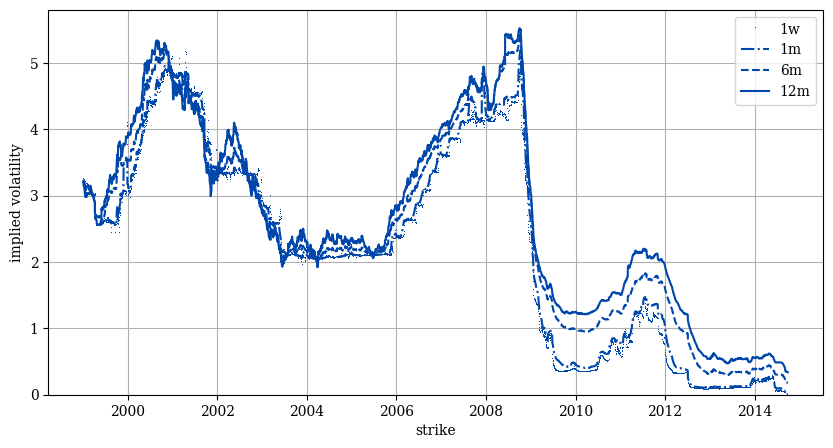

In [82]:
# Analyzing Euribor Interest Rate Data
# Read Data for Euribor from Excel file
def read_euribor_data():
    ''' Reads historical Euribor data from Excel file, calculates log returns,
    realized variance and volatility.'''
    EBO = pd.read_excel('EURIBOR_current.xlsx',
                        index_col=0, parse_dates=True)
    EBO['returns'] = np.log(EBO['1w'] / EBO['1w'].shift(1))
    EBO = EBO.dropna()
    return EBO

# Plot the Term Structure
markers = [',', '-.', '--', '-']
def plot_term_structure(data):
    ''' Plot the term structure of Euribor rates. '''
    plt.figure(figsize=(10, 5))
    for i, mat in enumerate(['1w', '1m', '6m', '12m']):
        plt.plot(data[mat].index, data[mat].values,
        markers[i], label=mat, color='#0047AB')
    plt.grid()
    plt.legend()
    plt.xlabel('strike')
    plt.ylabel('implied volatility')
    plt.ylim(0.0, plt.ylim()[1])

data = read_euribor_data()
plot_term_structure(data)